In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
######################################################################################################################

In [645]:
ads_data = pd.read_csv('ads_data.csv')

In [674]:
ads_data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [14]:
######################################################################################################################

In [15]:
# посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям

In [647]:
ads_by_events = ads_data.groupby(['ad_id', 'event'], as_index=False).agg({'ad_cost_type': 'count'})

In [648]:
pivot_ads_data = ads_by_events.pivot(index='ad_id', columns='event', values='ad_cost_type').fillna(0)

In [649]:
pivot_ads_data.click.mean().round(0)

113.0

In [650]:
pivot_ads_data.view.mean().round(0)

923.0

In [96]:
# В данном случае pivot равен pivot_table

In [644]:
pivot_table_ads_data = pd.pivot_table(ads_by_events \
               , index='ad_id' \
               , values='ad_cost_type' \
               , columns='event' \
               , aggfunc='mean' \
               , fill_value=0)

In [651]:
pivot_table_ads_data.click.mean().round(0)

113.0

In [653]:
pivot_table_ads_data.view.mean().round(0)

923.0

In [34]:
######################################################################################################################

In [35]:
# Давайте посмотрим на распределение показов объявлений!

# По оси x – число показов
# По оси y – доля объявлений с такими показами
# Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения.

In [643]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [139]:
# Фильтруем 0 показов, тк не считается логарифм

In [656]:
pivot_ads_data_no_zero = pivot_ads_data.loc[pivot_ads_data['view'] > 0]

In [657]:
pivot_ads_data_no_zero['view_log'] = np.log(pivot_ads_data_no_zero['view'])

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



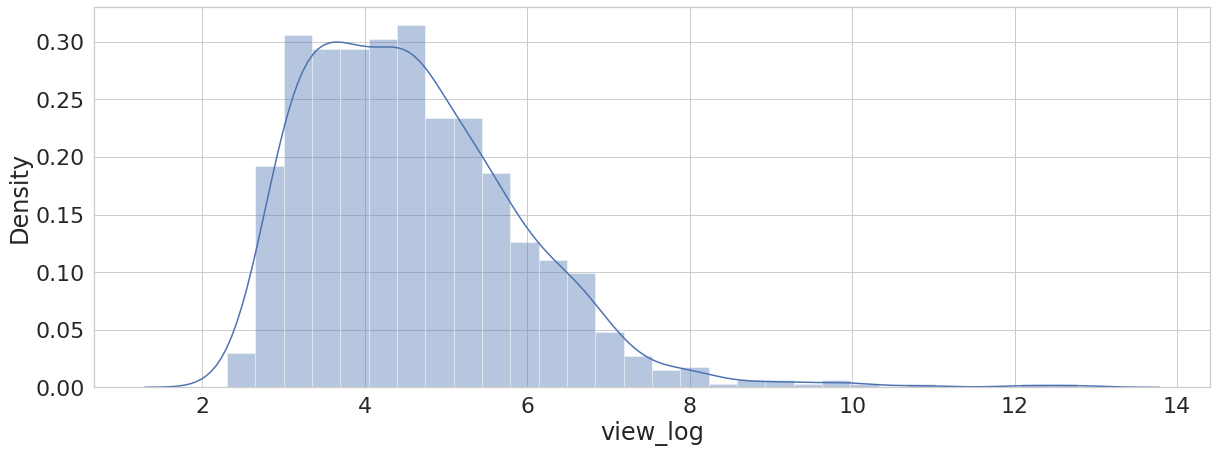

In [658]:
sns.distplot(pivot_ads_data_no_zero.view_log)

In [143]:
######################################################################################################################

In [ ]:
# Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням
# не учитывая объявления, у которых не было показов (обычное среднее)
# После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента

In [659]:
ads_data_by_date = ads_data.loc[ads_data.event == 'view'] \
                            .groupby(['date', 'ad_id', 'event'], as_index=False).agg({'ad_cost_type': 'count'}) \
                            .groupby(['date'], as_index=False).agg({'ad_cost_type': 'mean'})

In [661]:
ads_data_by_date['view_rolling'] = ads_data_by_date.ad_cost_type.rolling(window=2).mean().round().fillna(0)

In [662]:
ads_data_by_date['dif'] = ads_data_by_date['ad_cost_type'] - ads_data_by_date['view_rolling']

In [663]:
ads_data_by_date['dif'] = ads_data_by_date['dif'].abs()

In [664]:
ads_data_by_date

,date,ad_cost_type,view_rolling,dif
0,2019-04-01,154.482270,0.0,154.482270
1,2019-04-02,137.786982,146.0,8.213018
2,2019-04-03,163.952778,151.0,12.952778
3,2019-04-04,675.901720,420.0,255.901720
4,2019-04-05,919.109677,798.0,121.109677
5,2019-04-06,277.122727,598.0,320.877273


In [665]:
px.line(ads_data_by_date, x=ads_data_by_date.date, y=[ads_data_by_date.view_rolling, ads_data_by_date.ad_cost_type])


In [282]:
######################################################################################################################

In [ ]:
# Объедините данные рекламы с данными о рекламных клиентахнайдите среднее количество дней
# от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

# В качестве ответа укажите среднее число дней.

In [360]:
# Загружаем клиентские данные

In [667]:
ads_clients_data = pd.read_csv('ads_clients_data.csv', parse_dates=['date'])

In [362]:
# Вытаскиваем из объявлений дату первого запуска

In [680]:
client_first_run = ads_data.groupby('client_union_id', as_index=False) \
                            .agg({'date': 'min'}) \
                            .rename(columns={'date': 'date_first_run'})

In [369]:
# Джойним по клиентскому id, что бы получить список client_union_id с датами запуска и создания

In [682]:
client_dates = client_first_run.merge(ads_clients_data, how='right', on='client_union_id') \
                                    .rename(columns={'date': 'date_log'})

In [377]:
# Вычисляем разницу во времени

In [683]:
client_dates['create_date'] = pd.to_datetime(client_dates['create_date'])

In [684]:
client_dates['date_first_run'] = pd.to_datetime(client_dates['date_first_run'])

In [685]:
client_dates['run_time'] = client_dates['date_first_run'] - client_dates['create_date']

In [687]:
client_dates.run_time.mean()

Timedelta('124 days 09:04:43.532219570')

In [420]:
######################################################################################################################

In [421]:
# Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

In [688]:
run_year = client_dates.loc[client_dates['run_time'] <= pd.Timedelta(365, unit='day')]

In [690]:
num_runs_year = run_year['run_time'].count()

In [691]:
num_clients = client_dates.client_union_id.count()

In [692]:
conversion = num_runs_year / num_clients * 100
conversion.round(2)

0.69

In [420]:
######################################################################################################################

In [421]:
# Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

In [474]:
# Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

# Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней)
# Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]
# Создать временные промежутки можно с помощью pd.to_timedelta()

In [694]:
run_year.sort_values('run_time').head(20)

,client_union_id,date_first_run,date_log,community_id,create_date,run_time
108677,108678,2019-04-01,2020-05-07,-130114786,2019-03-06,26 days
21193,21194,2019-04-01,2020-05-07,-130548026,2019-03-04,28 days
38093,38094,2019-04-02,2020-05-07,-130048630,2019-03-05,28 days
24852,24853,2019-04-01,2020-05-07,-130667315,2019-03-04,28 days
116172,116173,2019-04-04,2020-05-07,-130303329,2019-03-06,29 days
98414,98415,2019-04-02,2020-05-07,-130986250,2019-03-04,29 days
2136,2137,2019-04-01,2020-05-07,-130145186,2019-03-03,29 days
27419,27420,2019-04-02,2020-05-07,-130623438,2019-03-04,29 days
110441,110442,2019-04-01,2020-05-07,-130505463,2019-03-03,29 days
14605,14606,2019-04-01,2020-05-07,-130949106,2019-03-03,29 days


In [699]:
cuts = pd.to_timedelta(['0 days', '31 days', '90 days', '180 days', '365 days'])

In [700]:
name_cuts = ['30', '90', '180', '365']

In [701]:
run_year['cuts'] = pd.cut(client_dates_run_year['run_time'], bins=cuts, labels=name_cuts)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [702]:
run_year_categories = run_year.groupby('cuts', as_index=False).agg({'client_union_id': 'count'})
run_year_categories

,cuts,client_union_id
0,30,11
1,90,261
2,180,397
3,365,169


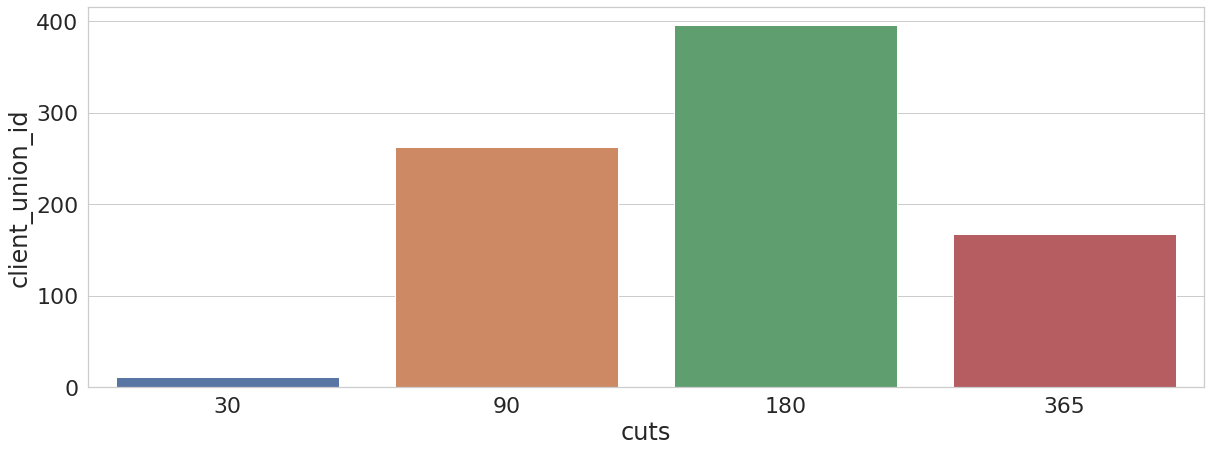

In [583]:
sns.barplot(data=run_year_categories, x='cuts', y='client_union_id')